# Starting. Setting up the directory

In [3]:
import os


DATA_DIR = os.path.join(os.getcwd(), 'data')
MODELS_DIR = os.path.join(DATA_DIR,'models')
for dir in [DATA_DIR, MODELS_DIR]:
    if not os.path.exists(dir):
        os.mkdir(dir)

# Setting up all of the variables

Note: This is just an addition. Each cell has already contained its own used variables

In [4]:
DATA_DIR = os.path.join(os.getcwd(), 'data')
MODELS_DIR = os.path.join(DATA_DIR,'models')
MODEL_DATE = "20200711"
MODEL_NAME = "ssd_mobilenet_v2_320x320_coco17_tpu-8"
MODEL_TAR_FILENAME = MODEL_NAME + '.tar.gz'
MODELS_DOWNLOAD_LINK = "http://download.tensorflow.org/models/object_detection/tf2/"+MODEL_DATE+'/'+MODEL_TAR_FILENAME
IMAGE_PATH = os.path.join(os.getcwd(),'data','workspace','images','collectedimages')
LABEL_IMAGE_PATH = os.path.join('data','workspace','labelimg')
LABEL_MAP_NAME = 'label_map.pbtxt'
LABEL_MAP_PATH = os.path.join('data','workspace','label_map',LABEL_MAP_NAME)
OBJECT_DETECTION_PATH = os.path.join('data','Tensorflow','models')
PATH_TO_PROTOC_FOLDER = os.path.join('data','Tensorflow','protoc')
PROTOC_ZIP_NAME = 'protoc-21.1-win64' + '.zip'
PATH_TO_PROTOC_ZIP = os.path.join(PATH_TO_PROTOC_FOLDER,PROTOC_ZIP_NAME)
PATH_TO_COCO = os.path.join('data','Tensorflow','coco')
COCO_DOWNLOAD_LINK = 'https://github.com/philferriere/cocoapi'
TF_RECORDS_PATH = os.path.join('data','workspace','TFRecords') 
TF_RECORDS_SCRIPT = os.path.join(TF_RECORDS_PATH,'generate_tfrecord.py')
PATH_TO_LABEL_MAP = os.path.join('data','workspace','label_map','label_map.pbtxt')
PATH_TO_ANNOTATION = os.path.join('data','workspace','annotations')
CHECKPOINT_PATH = os.path.join('data','workspace','checkpoint')
PATH_TO_CONFIG = os.path.join('data','models',MODEL_NAME,'pipeline.config')
TRAINING_SCRIPT = os.path.join('data','Tensorflow','models','research','object_detection','model_main_tf2.py')
MODEL_DIRECTORY = os.path.join('data','workspace','checkpoint')

# Download the Object_detection model and Append to respective folders

In [5]:
import tarfile
import urllib.request

MODEL_DATE = "20200711"
MODEL_NAME = "ssd_mobilenet_v2_320x320_coco17_tpu-8"
MODEL_TAR_FILENAME = MODEL_NAME + '.tar.gz'

MODELS_DOWNLOAD_LINK = "http://download.tensorflow.org/models/object_detection/tf2/"+MODEL_DATE+'/'+MODEL_TAR_FILENAME
paths = {'PATH_TO_MODEL_TAR' : os.path.join(MODELS_DIR, MODEL_TAR_FILENAME),
         'PATH_TO_CHECKPOINT' : os.path.join(MODELS_DIR, os.path.join(MODEL_NAME, 'checkpoint/')),
         'PATH_TO_CONFIGURE' : os.path.join(MODELS_DIR, os.path.join(MODEL_NAME, 'pipeline.config'))
         }
for path in paths.values():
    if not os.path.exists(path):
        print('Dowloading the model...',end='')
        urllib.request.urlretrieve(MODELS_DOWNLOAD_LINK,paths['PATH_TO_MODEL_TAR'])
        tar_file = tarfile.open(paths['PATH_TO_MODEL_TAR'])
        tar_file.extractall(MODELS_DIR)
        tar_file.close()
        os.remove(paths['PATH_TO_MODEL_TAR'])



# Setting up the labels and # of images

In [6]:
import cv2
import time

labels = ['BottleOfWater','Phone','Hat','Pen', 'Luong']
num_img = 6

In [7]:
IMAGE_PATH = os.path.join(os.getcwd(),'data','workspace','images','collectedimages')
# print(IMAGE_PATH)
if not os.path.exists(IMAGE_PATH):
    print('Making the Image Path...')
    os.mkdir(IMAGE_PATH)
for label in labels:
    path = os.path.join(IMAGE_PATH,label)
    print(path)
    if not os.path.exists(path):
        print('Making the folders for each label...')
        os.mkdir(path)

c:\Users\DELL\OneDrive - RMIT University\Documents\Python Code\Tensorflow Object Detection\ObjectDetection\data\workspace\images\collectedimages\BottleOfWater
Making the folders for each label...
c:\Users\DELL\OneDrive - RMIT University\Documents\Python Code\Tensorflow Object Detection\ObjectDetection\data\workspace\images\collectedimages\Phone
c:\Users\DELL\OneDrive - RMIT University\Documents\Python Code\Tensorflow Object Detection\ObjectDetection\data\workspace\images\collectedimages\Hat
Making the folders for each label...
c:\Users\DELL\OneDrive - RMIT University\Documents\Python Code\Tensorflow Object Detection\ObjectDetection\data\workspace\images\collectedimages\Pen
Making the folders for each label...
c:\Users\DELL\OneDrive - RMIT University\Documents\Python Code\Tensorflow Object Detection\ObjectDetection\data\workspace\images\collectedimages\Luong


# Setting up the labels and # of images 2

In [8]:
labels = ['Luong','Phone','Pillow']
num_img = 10

In [9]:
IMAGE_PATH = os.path.join(os.getcwd(),'data','workspace','images','collectedimages')
# print(IMAGE_PATH)
if not os.path.exists(IMAGE_PATH):
    print('Making the Image Path...')
    os.mkdir(IMAGE_PATH)
for label in labels:
    path = os.path.join(IMAGE_PATH,label)
    # print(path)
    if not os.path.exists(path):
        print('Making the folders for each label...')
        os.mkdir(path)

# Collecting the Images

In [40]:
for label in labels:
    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for image_num in range(num_img):
        print('Collecting image {}'.format(image_num))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGE_PATH, label, label + '{}.jpg'.format(image_num))
        cv2.imwrite(imgname,frame)
        cv2.imshow('Frame',frame)
        time.sleep(3)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Getting the library to label image

In [12]:
LABEL_IMAGE_PATH = os.path.join('data','workspace','labelimg')
if not os.path.exists(LABEL_IMAGE_PATH):
    os.mkdir(LABEL_IMAGE_PATH)
    !git clone https://github.com/tzutalin/labelImg {LABEL_IMAGE_PATH}
    

# Open the image labelling application (Imported from the above library)

In [41]:
!cd {LABEL_IMAGE_PATH} && pyrcc5 -o libs/resources.py resources.qrc
!cd {LABEL_IMAGE_PATH} && python labelImg.py

Image:C:\Users\DELL\OneDrive - RMIT University\Documents\Python Code\Tensorflow Object Detection\ObjectDetection\data\workspace\images\collectedimages\Luong\Luong0.jpg -> Annotation:C:/Users/DELL/OneDrive - RMIT University/Documents/Python Code/Tensorflow Object Detection/ObjectDetection/data/workspace/images/collectedimages/Luong/Luong0.xml
Image:C:\Users\DELL\OneDrive - RMIT University\Documents\Python Code\Tensorflow Object Detection\ObjectDetection\data\workspace\images\collectedimages\Luong\Luong1.jpg -> Annotation:C:/Users/DELL/OneDrive - RMIT University/Documents/Python Code/Tensorflow Object Detection/ObjectDetection/data/workspace/images/collectedimages/Luong/Luong1.xml
Image:C:\Users\DELL\OneDrive - RMIT University\Documents\Python Code\Tensorflow Object Detection\ObjectDetection\data\workspace\images\collectedimages\Luong\Luong2.jpg -> Annotation:C:/Users/DELL/OneDrive - RMIT University/Documents/Python Code/Tensorflow Object Detection/ObjectDetection/data/workspace/images/c

# CREATE A LABEL MAP

In [42]:
label_map = [{'name':'Luong','id':1},
             {'name': 'Phone','id':2},
             {'name': 'Pillow', 'id':3},
             {'name': 'Picture','id':4}]
LABEL_MAP_NAME = 'label_map.pbtxt'
LABEL_MAP_PATH = os.path.join('data','workspace','label_map',LABEL_MAP_NAME)
if not os.path.exists(LABEL_MAP_PATH):
    os.path.join(LABEL_MAP_PATH)
with open(LABEL_MAP_PATH,'w') as f:
    for label in label_map:
        f.write("item{ \n")
        f.write("\tname: '{}' \n".format(label['name']))
        f.write("\tid: {} \n".format(label['id']))
        f.write('} \n')


# Tensorflow Object Detection API Installation
### Don't need to run again if uneccesary

1. Downloading the TensorFlow Model Garden


In [14]:
OBJECT_DETECTION_PATH = os.path.join('data','Tensorflow','models')
if not os.path.exists(OBJECT_DETECTION_PATH):
    os.mkdir(OBJECT_DETECTION_PATH)
if not os.path.exists(os.path.join(OBJECT_DETECTION_PATH,'research')):
    !git clone https://github.com/tensorflow/models {OBJECT_DETECTION_PATH}

2. Protobuf Installation

In [16]:
from zipfile import ZipFile

PATH_TO_PROTOC_FOLDER = os.path.join('data','Tensorflow','protoc')
if not os.path.exists(PATH_TO_PROTOC_FOLDER):
    os.mkdir(PATH_TO_PROTOC_FOLDER)

PROTOC_ZIP_NAME = 'protoc-21.1-win64' + '.zip'
PATH_TO_PROTOC_ZIP = os.path.join(PATH_TO_PROTOC_FOLDER,PROTOC_ZIP_NAME)
if not os.path.exists(PATH_TO_PROTOC_ZIP):
    PROTOC_DOWNLOAD_LINK = 'https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip'
    urllib.request.urlretrieve(PROTOC_DOWNLOAD_LINK,PATH_TO_PROTOC_ZIP)
    with ZipFile(PATH_TO_PROTOC_ZIP,'r') as zip_ref:
        zip_ref.extractall(PATH_TO_PROTOC_FOLDER)
    os.remove(PATH_TO_PROTOC_ZIP)

In [17]:
!cd "data/Tensorflow/models/research/" && protoc object_detection/protos/*.proto --python_out=.

In [18]:
PATH = os.path.join('data','Tensorflow','models','research','setup.py')
if not os.path.exists(PATH):
    !cd "data/Tensorflow/models/research/" && copy "object_detection/packages/tf2" .
    !cd "data/Tensorflow/models/research/" && python -m pip install --use-feature=2020-resolver .

3. COCO API Installation

In [21]:
PATH_TO_COCO = os.path.join('data','Tensorflow','coco')
COCO_DOWNLOAD_LINK = 'https://github.com/philferriere/cocoapi'

if not os.path.exists(PATH_TO_COCO):
    os.mkdir(PATH_TO_COCO)

PATH_TO_A_COCO_FOLDER = os.path.join(PATH_TO_COCO,'PythonAPI')
if not os.path.exists(PATH_TO_A_COCO_FOLDER):
    !git clone https://github.com/philferriere/cocoapi {PATH_TO_COCO}

Upgrade tf_v1 files to tf_v2

In [22]:
# !tf_upgrade_v2 \
#   --intree tfod\Lib\site-packages\object_detection\ \
#   --outtree tfod\Lib\site-packages\object_detection\ \
#   --reportfile report.txt

# Generate TF Records from the images

In [43]:
TF_RECORDS_PATH = os.path.join('data','workspace','TFRecords') 
if not os.path.exists(TF_RECORDS_PATH):
    os.mkdir(TF_RECORDS_PATH)
    
# CLONING THE TF RECORD GENERATION SCRIPT 
TF_RECORDS_SCRIPT = os.path.join(TF_RECORDS_PATH,'generate_tfrecord.py')
if not os.path.exists(TF_RECORDS_SCRIPT):
    !git clone https://github.com/nicknochnack/GenerateTFRecord/ {TF_RECORDS_PATH}

1. Small Step: Move all pictures in each label folder to one consolidated folder

In [44]:
import shutil
import os

PATH_TO_TRAIN = os.path.join('data','workspace','images','collectedimages','train')
PATH_TO_TEST = os.path.join('data','workspace','images','collectedimages','test')
def makedir(path):
    if not os.path.exists(path):
        os.mkdir(path)
makedir(PATH_TO_TRAIN)
makedir(PATH_TO_TEST)

for label in labels:  
    source_dir = os.path.join('data','workspace','images','collectedimages',label)  
    file_names = os.listdir(source_dir) 
    for file_name in file_names[:10]:
        shutil.copy(os.path.join(source_dir, file_name), PATH_TO_TRAIN)
    for file_name in file_names[-2:]:
        shutil.copy(os.path.join(source_dir, file_name), PATH_TO_TEST)
    

Generate TF Records for each images and their relative xml files. Then append them to Annotations folder 

In [47]:
PATH_TO_LABEL_MAP = os.path.join('data','workspace','label_map','label_map.pbtxt')
# PATH_TO_TRAIN_RECORD = os.path.join('data','workspace','TFRecords','train.record')
PATH_TO_ANNOTATION = os.path.join('data','workspace','annotations')
if not os.path.exists(os.path.join(PATH_TO_ANNOTATION,'train.record')):
    !python {TF_RECORDS_SCRIPT} -x {PATH_TO_TRAIN} -l {PATH_TO_LABEL_MAP} -o {os.path.join(PATH_TO_ANNOTATION,'train.record')}
if not os.path.exists(os.path.join(PATH_TO_ANNOTATION,'test.record')):
    !python {TF_RECORDS_SCRIPT} -x {PATH_TO_TEST} -l {PATH_TO_LABEL_MAP} -o {os.path.join(PATH_TO_ANNOTATION,'test.record')}
    

Successfully created the TFRecord file: data\workspace\annotations\train.record


2022-06-25 13:13:14.267956: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-25 13:13:14.268460: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-25 13:13:32.762592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-25 13:13:32.764356: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-06-25 13:13:32.765667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-06-25 13:13:32.766588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

Successfully created the TFRecord file: data\workspace\annotations\test.record


2022-06-25 13:13:33.923070: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-25 13:13:33.923657: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-25 13:13:39.400990: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-25 13:13:39.401899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-06-25 13:13:39.402727: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-06-25 13:13:39.403535: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

# Create a CHECKPOINT path and Copy Model Config to it
### Don't need to run again if unnecessary

In [56]:
CHECKPOINT_PATH = os.path.join('data','workspace','checkpoint')
if not os.path.exists(CHECKPOINT_PATH):
    os.mkdir(CHECKPOINT_PATH)
if not os.path.exists(os.path.join(CHECKPOINT_PATH,'pipeline.config')):
    !copy {PATH_TO_CONFIG} {CHECKPOINT_PATH}


        1 file(s) copied.


# Update Config for Transfer Learning

In [57]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [58]:
PATH_TO_CONFIG = os.path.join('data','models',MODEL_NAME,'pipeline.config')
config = config_util.get_configs_from_pipeline_file(PATH_TO_CONFIG)

In [59]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(PATH_TO_CONFIG, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [60]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = num_img
pipeline_config.train_config.fine_tune_checkpoint = os.path.join('data', 'models', MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= os.path.join('data','workspace','label_map','label_map.pbtxt')
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join('data','workspace','annotations','train.record')]
pipeline_config.eval_input_reader[0].label_map_path = os.path.join('data','workspace','label_map','label_map.pbtxt')
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join('data','workspace','annotations','test.record')]

In [61]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(PATH_TO_CONFIG, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# Train the model
### Don't run again if unnecessary

In [62]:
TRAINING_SCRIPT = os.path.join('data','Tensorflow','models','research','object_detection','model_main_tf2.py')
MODEL_DIRECTORY = os.path.join('data','workspace','checkpoint')

In [63]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=1000".format(TRAINING_SCRIPT,MODEL_DIRECTORY,PATH_TO_CONFIG)

In [64]:
# print(command)

In [65]:
!{command}

2022-06-25 13:22:04.791833: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-25 13:22:04.792876: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
c:\Users\DELL\OneDrive - RMIT University\Documents\Python Code\Tensorflow Object Detection\ObjectDetection\tfod\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:37: UserWarning: You are currently using a nightly version of TensorFlow (2.10.0-dev20220623). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  warnings.warn(
2022-06-25 13:22:14.792621: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-25 13:22:

In [11]:
CHECKPOINT_DIRECTORY = os.path.join('data','models',MODEL_NAME,'checkpoint','ckpt-2')

command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir{}".format(TRAINING_SCRIPT,MODEL_DIRECTORY,PATH_TO_CONFIG,CHECKPOINT_DIRECTORY)

In [21]:
!{command}

^C


# Load Trained Model from Checkpoint

In [1]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [10]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CONFIG)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join('data','workspace','checkpoint', 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detect from Image

In [11]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABEL_MAP)

In [14]:
IMAGE_PATH = os.path.join('data','workspace','images','collectedimages','train','Luong3.jpg')

INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0


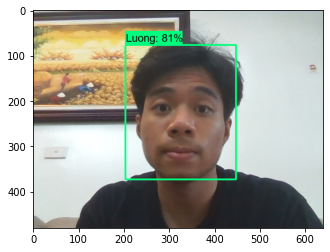

In [15]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [77]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [84]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break